In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)
input_path = '../input/'
df = pd.read_csv(os.path.join(input_path, 'train.csv'))

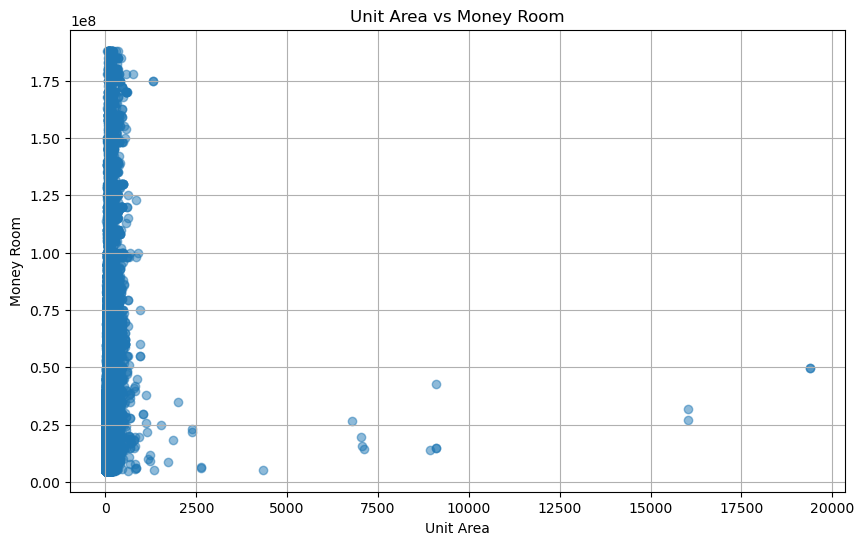

In [ ]:
df.head()




Data shape after removing outliers: (316850, 150)


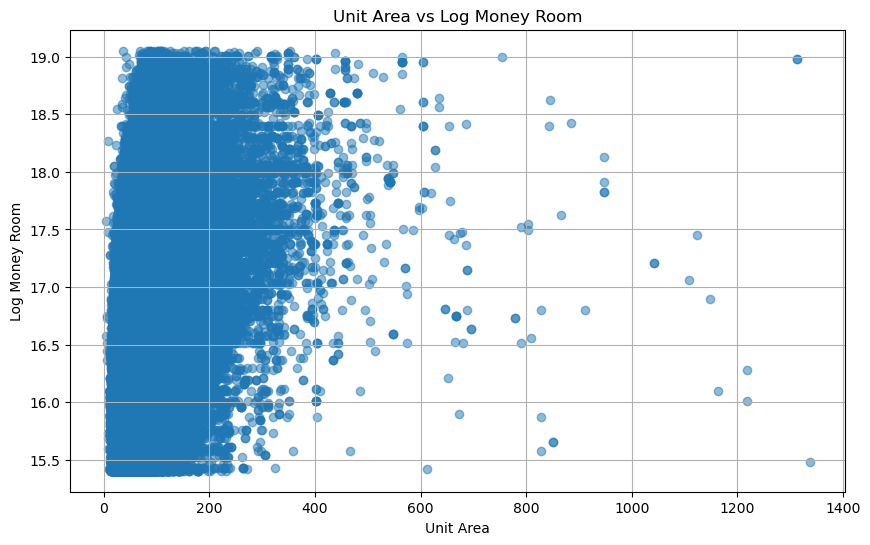

                unit_area  log_money_room
unit_area        1.000000        0.205148
log_money_room   0.205148        1.000000


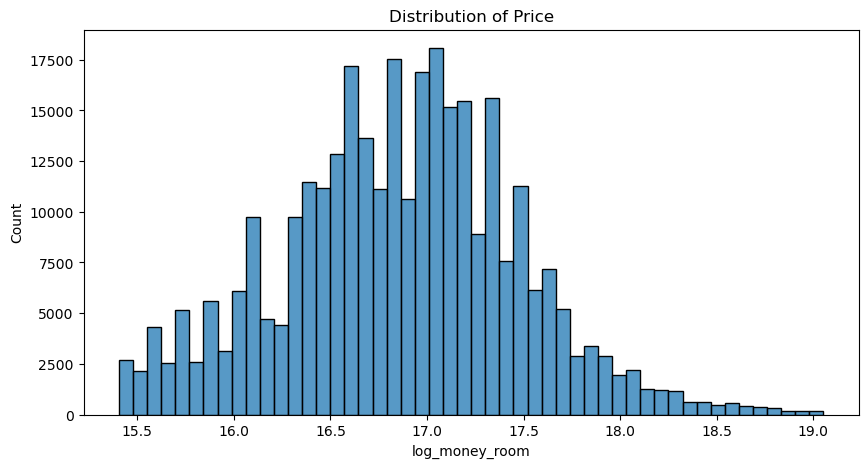

In [ ]:
# 面積(unit_area)が大きい順に上位10件を表示
# 「どのくらいの数字からおかしいか」を確認します

#print(df[['unit_area', 'money_room', 'building_type']].sort_values(by='unit_area', ascending=False).head(20))
treshold = 1500
#裾が広すぎるのでlog変換
df['log_money_room'] = np.log1p(df['money_room'])
df = df[df['unit_area'] < treshold]
print(f"Data shape after removing outliers: {df.shape}")

plt.figure(figsize=(10, 6))
plt.scatter(df['unit_area'], df['log_money_room'], alpha=0.5)
plt.title('Unit Area vs Log Money Room')
plt.xlabel('Unit Area')
plt.ylabel('Log Money Room')
plt.grid(True)
plt.show()
print(df[['unit_area', 'log_money_room']].corr())
plt.figure(figsize=(10, 5))
sns.histplot(df['log_money_room'], bins=50)
plt.title('Distribution of Price')
plt.show()

In [ ]:
X = df.drop('money_room', axis=1)
y = df['money_room']

,target_ym,building_id,building_status,building_create_date,building_modify_date,building_type,building_name,building_name_ruby,homes_building_name,homes_building_name_ruby,unit_count,full_address,lon,lat,building_structure,total_floor_area,building_area,floor_count,basement_floor_count,year_built,building_land_area,land_area_all,unit_area_min,unit_area_max,building_land_chimoku,land_youto,land_toshi,land_chisei,land_area_kind,land_setback_flg,land_setback,land_kenpei,land_youseki,land_road_cond,land_seigen,building_area_kind,management_form,management_association_flg,reform_exterior,reform_exterior_other,reform_exterior_date,reform_common_area,reform_common_area_date,building_tag_id,unit_id,unit_name,name_ruby,room_floor,balcony_area,dwelling_unit_window_angle,room_count,unit_area,floor_plan_code,reform_date,reform_place,reform_place_other,reform_wet_area,reform_wet_area_other,reform_wet_area_date,reform_interior,reform_interior_other,reform_interior_date,reform_etc,renovation_date,renovation_etc,unit_tag_id,bukken_id,snapshot_create_date,new_date,snapshot_modify_date,timelimit_date,bukken_type,flg_investment,empty_number,empty_contents,post1,post2,addr1_1,addr1_2,addr2_name,addr3_name,nl,el,rosen_name1,eki_name1,bus_stop1,bus_time1,walk_distance1,rosen_name2,eki_name2,bus_stop2,bus_time2,walk_distance2,traffic_other,traffic_car,snapshot_land_area,snapshot_land_shidou,land_shidou_a,land_shidou_b,land_mochibun_a,land_mochibun_b,house_area,flg_new,house_kanrinin,room_kaisuu,snapshot_window_angle,madori_number_all,madori_kind_all,money_kyoueki,money_kyoueki_tax,money_rimawari_now,money_shuuzen,money_shuuzenkikin,money_sonota_str1,money_sonota1,money_sonota_str2,money_sonota2,money_sonota_str3,money_sonota3,parking_money,parking_money_tax,parking_kubun,parking_distance,parking_number,parking_memo,genkyo_code,usable_status,usable_date,school_ele_name,school_ele_distance,school_ele_code,school_jun_name,school_jun_distance,school_jun_code,convenience_distance,super_distance,hospital_distance,park_distance,drugstore_distance,bank_distance,shopping_street_distance,est_other_name,est_other_distance,statuses,parking_keiyaku,money_hoshou_company,free_rent_duration,free_rent_gen_timing
0,201901,206271,1,2014-06-27 21:09:41,2019-01-24 00:10:08,4,NaN,NaN,桑名市東正和台7丁目10-11,NaN,NaN,三重県桑名市東正和台7丁目10-11,136.637467,35.047688,1.0,106.820000,NaN,2.0,NaN,199204.0,188.490005,188.490005,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,50.0,80.0,NaN,NaN,1.0,NaN,NaN,NaN,外壁塗装,201807.0,NaN,NaN,210202/210301/210101,262186,NaN,NaN,NaN,NaN,NaN,4.0,106.820000,450.0,NaN,NaN,NaN,1/2/3/4,NaN,201807.0,NaN,畳表替え,201807.0,NaN,NaN,NaN,310501/220701/220601/230401,360840,2018-10-30 00:00:00,2018-10-30 00:00:00,2019-01-22 13:20:11,2019-02-05 00:00:00,1202,NaN,1.0,NaN,511.0,932.0,24,205,東正和台7丁目,NaN,126159934.0,491905398.0,三岐鉄道北勢線,在良,NaN,NaN,1840.0,NaN,NaN,NaN,NaN,NaN,コミュニティバス「東正和台」停より約 500m,NaN,188.49,NaN,NaN,NaN,NaN,NaN,106.82,0.0,NaN,NaN,NaN,4,50,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,2.0,NaN,2.0,1,NaN,桑部小学校,2000.0,NaN,正和中学校,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210101/220701/220601/230401/310501/210301/210202,NaN,NaN,NaN,NaN
1,201901,83315,1,2014-06-27 21:09:43,2019-04-03 00:10:08,4,NaN,NaN,桑名市松ノ木5丁目,NaN,1.0,三重県桑名市松ノ木5丁目14-8,136.639936,35.074625,10.0,NaN,NaN,2.0,NaN,198108.0,290.519989,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.2,50.0,80.0,1.0,NaN,NaN,NaN,NaN,2,外壁塗装,201706.0,NaN,NaN,330501/210301/210101/210201,35726,NaN,NaN,NaN,NaN,5.0,4.0,134.039993,450.0,NaN,NaN,NaN,1/2/3/4,キッチン・ユニットバス・洗面化粧台コーティング/トイレ新品,201706.0,2/4,NaN,201706.0,NaN,2017-06-01,外装外壁塗装 内装システムキッチン新品/お風呂新品/洗面台新品/トイレ新品/フローリング上張...,260201/260301/220801/230601/260101/230101/2203...,267022,2018-10-30 00:00:00,2018-10-30 00:00:00,2019-01-30 15:15:49,2019-02-13 00:00:00,1202,NaN,NaN,NaN,511.0,902.0,24,205,松ノ木5丁目,NaN,126256831.0,491914000.0,三岐鉄道北勢線,星川,NaN,NaN,1920.0,NaN,NaN,NaN,NaN,NaN,コミュニティバス「法務局前」停より約400m,NaN,290.52,NaN,NaN,NaN,NaN,NaN,134.04,0.0,NaN,NaN,NaN,4,50,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Na